Detect possible cloud bands on 24 February 2021 using ERA5 3 hourly olr data, and create a map showing the orientation of the cloud band needed for filtering cloud bands. The cloud bands are the ones from the `plot_inheritance_tracking` notebook.

In [1]:
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

from cloudbandpy.load_driver import run_load_data
from cloudbandpy.cb_detection import detection_workflow
from cloudbandpy.figure_tools import plot_bbox_around_blobs
from cloudbandpy.io_utilities import load_ymlfile, add_startend_datetime2config

Load configuration file and make adjustements for this test case

In [2]:
config_file = "../config/config_cbworkflow_southPacific.yml"
config = load_ymlfile(config_file, isconfigfile=True)
config_event = config.copy()
# Changing configs to adapt to this particular example
config_event["startdate"] = "20210224.00"
config_event["enddate"] = "20210224.00"
# update datetime dates from config file
add_startend_datetime2config(config_event)
dirdata= "../data/"
config_event["clouddata_path"] = os.path.join("../data")
config_event["parameters_file"] = os.path.join("../parameters/parameters_southhemisphere.yml")
# No need to save any files
config_event["saved_dirpath"] = ""
config_event["save_dailyvar"] = False
config_event["save_listcloudbands"] = False

2023-05-08 15:01:39,244 - io_utilities.load_ymlfile - INFO: Configuration file loaded


Load ERA5 data and get its resolution, and load parameters file. The ERA5 file contains OLR data from 01.01.2021 to 30.05.2021.

In [3]:
olr2process, parameters, listofdates, lats, lons, resolution = run_load_data(config_event)
print(listofdates)

2023-05-08 15:01:39,260 - load_driver.run_load_data - INFO: Loading data and parameters 
2023-05-08 15:01:39,261 - io_utilities.load_ymlfile - INFO: Parameters file loaded
2023-05-08 15:01:39,262 - io_utilities.load_dataset - INFO: Loading dataset from ../data
2023-05-08 15:01:39,262 - io_utilities.load_dataset - INFO: Loading 2021 --> 2021
2023-05-08 15:01:39,999 - io_utilities.get_variable_lonlat_from_domain - INFO: Subsetting dataset on domain done
2023-05-08 15:01:40,008 - io_utilities.make_daily_average - INFO: Computation of daily average
2023-05-08 15:01:40,030 - io_utilities.make_daily_average - INFO: Computation of daily average done
2023-05-08 15:01:40,033 - io_utilities.load_dataset - INFO: Dataset loaded


DatetimeIndex(['2021-02-24'], dtype='datetime64[ns]', freq='D')


Run cloud band detection

In [4]:
(
        _,
        _,
        _,
        labelled_candidates,
        _,
        _,
    ) = detection_workflow(
        var2process=olr2process,
        parameters=parameters,
        latitudes=lats,
        longitudes=lons,
        resolution=resolution,
        listofdates=listofdates,
        config=config,
    )

2023-05-08 15:01:40,061 - cb_detection.detection_workflow - INFO: Cloud band detection in progress
2023-05-08 15:01:40,069 - cb_detection.detection_workflow - INFO: Cloud band detection done


#### Create the series of maps which show the evolution of cloud bands over time over the South Pacific domain

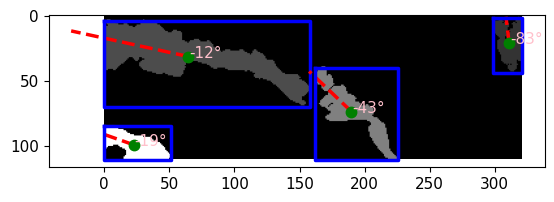

In [5]:
plot_bbox_around_blobs(labelled_candidates[0], date=listofdates[0], config=config, show=True, save=False)